# MAFALDA Dataset Exploratory Data Analysis

URL: https://github.com/ChadiHelwe/MAFALDA



In [14]:
%load_ext autoreload
%autoreload 2

from src.mafalda import get_mafalda_df
from src.plot import save_plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df = get_mafalda_df('new')

[2024-11-16 11:36:26] Created new mafalda dataframe.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   text                   200 non-null    object
 1   labels                 200 non-null    object
 2   comments               200 non-null    object
 3   sentences_with_labels  200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [12]:
df['label_count'] = df['labels'].apply(lambda x: len(x))

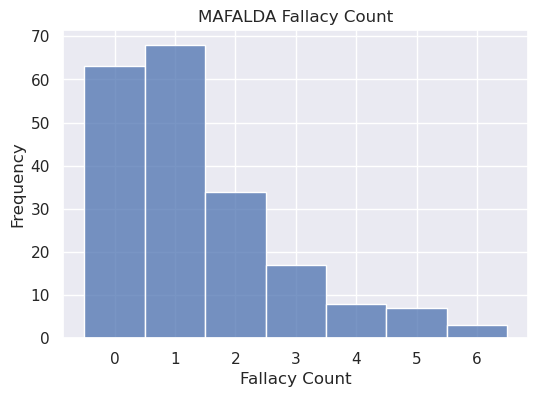

In [21]:
_, ax = plt.subplots(figsize=(6, 4))
sns.histplot(df['label_count'], discrete=True, ax=ax)

title = 'MAFALDA Fallacy Counts'
plt.title(title)
plt.xlabel('Fallacy Count')
plt.ylabel('Frequency')
# plt.bar_label(ax.containers[0], label_type='edge')

save_plot(title)
plt.show()

In [22]:
df['text_length'] = df['text'].apply(lambda x: len(x))

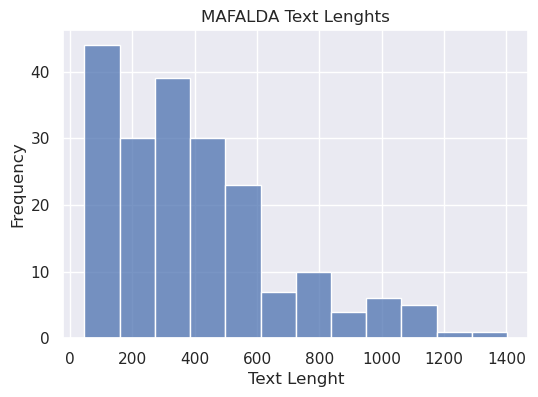

In [25]:
_, ax = plt.subplots(figsize=(6, 4))
sns.histplot(df['text_length'], ax=ax)

title = 'MAFALDA Text Lenghts'
plt.title(title)
plt.xlabel('Text Lenght')
plt.ylabel('Frequency')

save_plot(title)
plt.show()

In [23]:
debug = 'debug'